### TAREFA

**Ex1**: Analise e quantifique a relação da variável survived com a variável sex usando o conjunto de dados do titanic. Faça seus gráficos e calcule o chi-quadrado para quantificar a relação.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
df = pd.read_csv("titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Text(0.5, 1.0, 'Sobreviventes separados por Sexo')

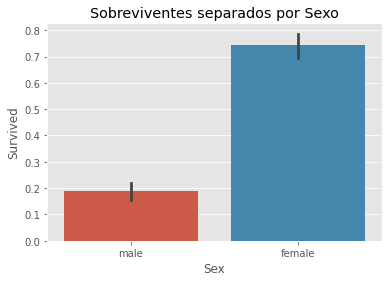

In [3]:
sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Sobreviventes separados por Sexo')

In [4]:
# Distribuição geral da variável survived como já observado antes:

dist_geral = pd.DataFrame(round(df.Survived.value_counts()/df.shape[0],2))

dist_geral


,Survived
0,0.62
1,0.38


In [5]:

# Vamos escrever a tabela de frequencia para os dados observados.

#OBSERVADO:

# Tabela de frequência absoluta -- será usado para o cálculo do chi-quadrado
df_sex = df.groupby('Sex').apply(lambda x: x.Survived.value_counts()).unstack()


# Estamos calculando os valores, considerando o total pelas linhas, ou seja, pela variável Sex
df_sex_pct = df.groupby('Sex').apply(lambda x: x.Survived.value_counts()/x.shape[0]).unstack()

df_sex_pct

,0,1
Sex,,
female,0.257962,0.742038
male,0.811092,0.188908


In [6]:
#Interpretação: 25% do sexo feminino morreram, enquanto que 75% sobreviveram

#tabela de frequência criada acima com os totais em valor absoluto

df_sex['total'] = df_sex['total'] = df_sex[[0]].values + df_sex[[1]].values 

df_sex

,0,1,total
Sex,,,
female,81,233,314
male,468,109,577


In [7]:
# Vamos agora calcular a tabela de frequência esperada, caso as duas variáveis não tivesse relação.
# Se esse fosse o caso, esperaríamos ter 62% de zeros e 38% de uns

#ESPERADO:

esp_0 = df_sex.total.values * dist_geral.iloc[0].values
esp_1 = df_sex.total.values * dist_geral.iloc[1].values

df_esp = pd.DataFrame(np.c_[esp_0,esp_1])

df_esp

,0,1
0,194.68,119.32
1,357.74,219.26


In [8]:
# Cálculo do chi-quadrado

# Observado menos o esperado: o_i - e_i == desvio
desvios = (df_sex.iloc[:,:2].values - df_esp.values)
print(desvios)

#(o_i - e_i)^2
desvios_ao_quadaro = desvios**2

#(o_i - e_i)^2 / e_i

chi_quad = sum(sum(desvios_ao_quadaro/df_esp.values))

print("\nO chi-quadrado de Pearson é de:", chi_quad, "indicando uma 'boa' relação entre as variáveis!")

[[-113.68  113.68]
 [ 110.26 -110.26]]

O chi-quadrado de Pearson é de: 264.11838848422303 indicando uma 'boa' relação entre as variáveis!


    
**Ex2**: 

OBS: Estude e rode o código que deixamos em anexo ao conteúdo do curso para resolver esse exercício.

Após rodar o código em anexo, faça um círculo branco no gráfico do conteúdo em anexo, indicando os pontos $(x1, x2)$ tais que $x1^2$ + $x2^2$ $\sim$ 10. Ou seja, pares $(x1, x2)$ cujo valor da f é próximo de 10.

Considere que "próximo" neste caso significa que o valor resultante da f não pode ser maior, em módulo do que 1. Isto é $-1<f(x) - 10 < 1$, ou seja,  $9 <f(x)<11$

<br>
<div>
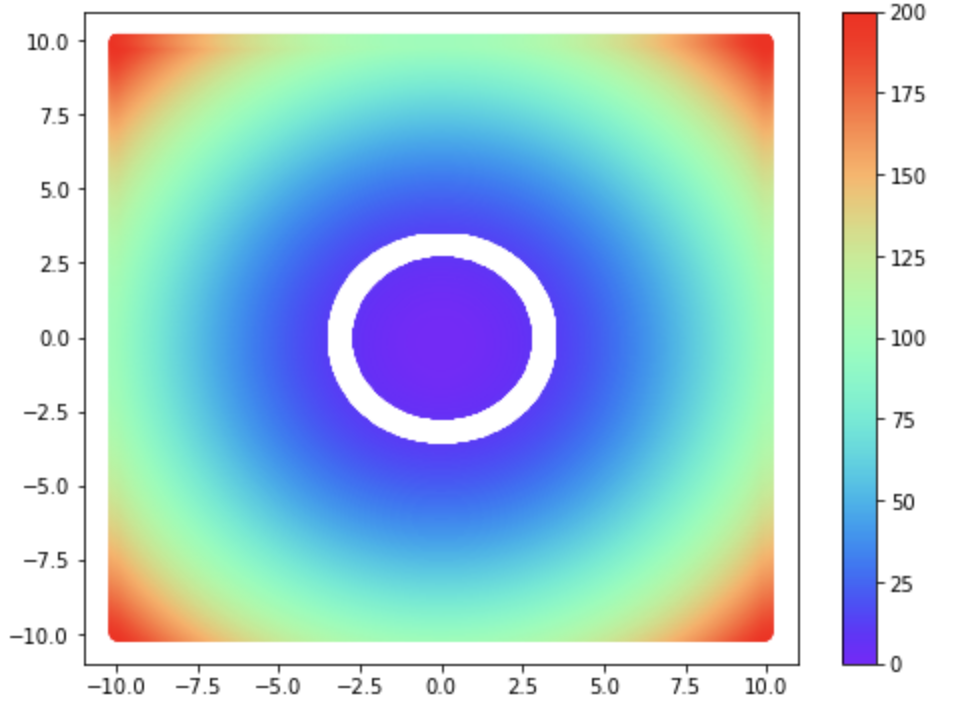
</div>

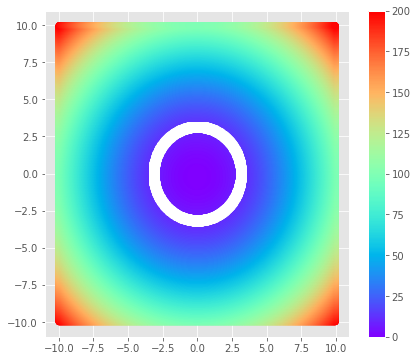

In [9]:
def f(x1, x2):
    return x1**2 + x2**2

# Usando esses dois vetores, queremos criar uma malha. Queremos preencher todo o grafico com pontos. 

def create_meshgrid(x1_lims, x2_lims):
    x1mesh, x2mesh = np.meshgrid(x1_lims, x2_lims)
    return np.c_[x1mesh.ravel(), x2mesh.ravel()]

x1_lims = np.arange(-10,10,0.02)
x2_lims = np.arange(-10,10,0.02)
mesh = create_meshgrid(x1_lims, x2_lims)
mesh.shape


x_lims = np.arange(9.02,10,0.02)
y_lims = np.arange(9.02,10,0.02)
mesh1= create_meshgrid(x_lims,y_lims)
mesh1.shape
L = []
R = []
x_aux=[]
y_aux=[]
for v in mesh:
    x1 = v[0]
    x2 = v[1]
    value_f = f(x1, x2)
    L.append(value_f)
    if value_f >=9 and value_f <=11:
        R.append(0)
        x_aux.append(x1)
        y_aux.append(x2)
plt.figure(figsize=[15,6])
#plt.subplot(1,2,1)
#plt.scatter(mesh[:, 0], mesh[:, 1])
plt.subplot(1,2,2)
plt.scatter(mesh[:, 0], mesh[:, 1], c = L, cmap = plt.cm.rainbow)
plt.colorbar()
plt.scatter(x_aux, y_aux,c="white", cmap=plt.cm.gray)
plt.show()

Ex3: Use o dataframe df, carregado abaixo, onde  cada observação corresponde a uma reclamação feita 
pelo consumidor, para responder as perguntas abaixo:

1 - Qual o número de reclamações por Estado?<br>
2 - Qual a quantidade de reclamações por sexo?<br>
3 - O tempo de resposta tem alguma correlação com a nota do consumidor?<br>
4 - Proporção de reclamações registradas e não respondidas.<br>
5 - Imagine que você é alguém responsável por monitorar a satisfação dos consumidores. Que outros tipos de pergunta e análises você entende que poderiam ser feitas? Acrescente mais duas perguntas feitas por você, bem como suas análises para responde-las. 
**Importante**: É interessante que as análises contenham gráficos. No dia-a-dia de um cientista, grande parte do  trabalho é analisar dados e gerar visualizações para apresentá-las.

_fonte_ : https://dados.gov.br/dataset/reclamacoes-do-consumidor-gov-br1 (Nesse link estão os dicionário de dados, caso possua dúvidas sobre base).

In [10]:
import pandas as pd
%matplotlib inline
%pylab inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

df = pd.read_csv("dadosgovbr---2014.csv",sep = ';', encoding="latin-1")

df.head()

Populating the interactive namespace from numpy and matplotlib


C:\Users\atmal\anaconda3\lib\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


,Gestor,Canal de Origem,Região,UF,Cidade,Sexo,Faixa Etária,Ano Abertura,Mês Abertura,Data Abertura,...,Como Comprou Contratou,Procurou Empresa,Respondida,Situação,Avaliação Reclamação,Nota do Consumidor,Análise da Recusa,Edição de Conteúdo,Interação do Gestor,Total
0,Secretaria Nacional do Consumidor,Não identificado,SE,RJ,Itaboraí,M,entre 31 a 40 anos,2014,6,27/06/2014,...,Não comprei / contratei,S,S,Finalizada não avaliada,Não Avaliada,NaN,NaN,N,N,1
1,Instituto Estadual de Proteção e Defesa do Con...,Não identificado,SE,ES,Serra,F,entre 31 a 40 anos,2014,6,11/06/2014,...,Internet,S,S,Finalizada avaliada,Não Resolvida,1.0,NaN,N,N,1
2,Secretaria Nacional do Consumidor,Não identificado,SE,RJ,Volta Redonda,M,entre 31 a 40 anos,2014,6,27/06/2014,...,Internet,S,S,Finalizada avaliada,Resolvida,5.0,NaN,N,N,1
3,Instituto de Promoção e Defesa do Cidadão e Co...,Não identificado,NE,MA,São Luís,F,entre 31 a 40 anos,2014,5,29/05/2014,...,Não comprei / contratei,S,S,Finalizada avaliada,Resolvida,5.0,NaN,N,N,1
4,Secretaria de Desenvolvimento Social e Direito...,Não identificado,NE,PE,Recife,M,entre 21 a 30 anos,2014,6,30/06/2014,...,Internet,S,S,Finalizada não avaliada,Não Avaliada,NaN,NaN,N,N,1


SP    11882
PR     6140
RJ     4907
MG     4186
BA     2443
Name: UF, dtype: int64


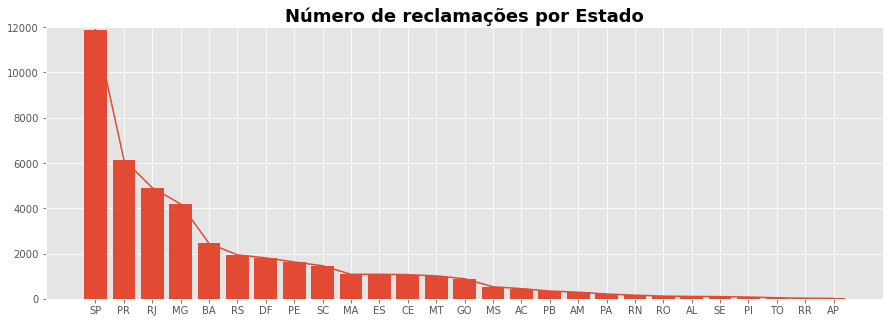

In [11]:
#1)

data=pd.read_csv("dadosgovbr---2014.csv",sep=(";"),encoding="latin-1")
print(data.UF.value_counts().head())
data1=pd.DataFrame(data=data.UF.value_counts())
plt.figure(figsize=(15,5))
plt.title("Número de reclamações por Estado",fontsize=18,fontweight=("bold"))
plt.ylim(0,12000)
plt.bar(data1.index,data1.UF)
plt.plot(data1)
plt.show()

Text(0.5, 1.0, 'Número de reclamações por sexo')

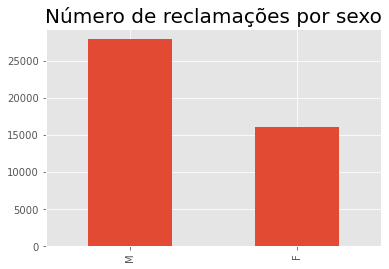

In [12]:
#2)
data['Sexo'].value_counts().plot(kind='bar');
plt.title("Número de reclamações por sexo",fontsize=20)

In [13]:
#3)
df=pd.read_csv("dadosgovbr---2014.csv",sep=(";"),encoding="latin-1")
df.columns

Index(['Gestor', 'Canal de Origem', 'Região', 'UF', 'Cidade', 'Sexo',
       'Faixa Etária', 'Ano Abertura', 'Mês Abertura', 'Data Abertura',
       'Hora Abertura', 'Data Resposta', 'Hora Resposta', 'Data Análise',
       'Hora Análise', 'Data Recusa', 'Hora Recusa', 'Data Finalização',
       'Hora Finalização', 'Prazo Resposta', 'Prazo Analise Gestor',
       'Tempo Resposta', 'Nome Fantasia', 'Segmento de Mercado', 'Área',
       'Assunto', 'Grupo Problema', 'Problema', 'Como Comprou Contratou',
       'Procurou Empresa', 'Respondida', 'Situação', 'Avaliação Reclamação',
       'Nota do Consumidor', 'Análise da Recusa', 'Edição de Conteúdo',
       'Interação do Gestor', 'Total'],
      dtype='object')

In [14]:
df.rename(columns={"Nota do Consumidor":"nota","Tempo Resposta":"tempo"},inplace=True)
df1=pd.DataFrame(data=df.tempo.value_counts())

In [15]:
media=[]
for i in range(len(df1.index)):
    x=round(df[df.tempo==i].nota.mean(),2)
    media.append(x)
print(media) 

[3.63, 3.46, 3.38, 3.32, 3.3, 3.22, 3.25, 3.13, 2.89, 2.75, 2.58, 2.2, 1.0, 1.0]


In [16]:
df2=pd.DataFrame(data=np.arange(1,15,1))
df2["Media_da_Nota"]=media
df2.rename(columns={0:"Dias_Resposta"},inplace=True)

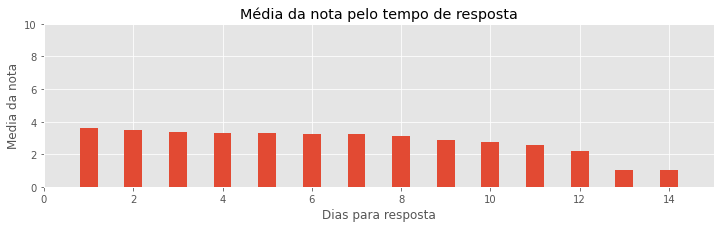

In [17]:
## Podemos verificar no gráfico abaixo que quanto mais se passam os dias para responder, menor a nota.


plt.figure(figsize=(12,3))
plt.bar(df2.Dias_Resposta.unique(),df2.Media_da_Nota,width=0.4)
plt.title("Média da nota pelo tempo de resposta")
plt.ylim(0,10)
plt.xlim(0,15)
plt.xlabel("Dias para resposta",fontsize=12)
plt.ylabel("Media da nota",fontsize=12)
plt.show()

S    0.953941
N    0.046059
Name: Respondida, dtype: float64


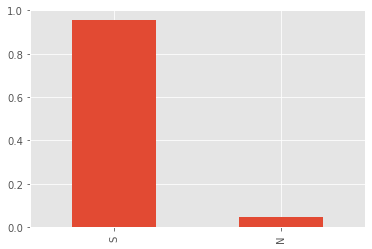

In [18]:
#4) 95% de reclamações respondidas

r_nr=data.Respondida.value_counts()/data.Respondida.count()
print(r_nr)
r_nr.plot(kind='bar');

In [19]:
#5.1) Quais o canal menos eficaz? 
df.rename(columns={"Como Comprou Contratou":"canal_compra"},inplace=True)
df5=pd.DataFrame(data=df.canal_compra.value_counts())
df5.head()

,canal_compra
Telefone,12840
Internet,10638
Loja física,10439
Não comprei / contratei,7697
Domicílio,1398


O investimento feito no canal domicílio pode ser transferido para os canais que dão mais retorno.

In [20]:
#5.2) Quais os problemas que possuem maior impacto?
df.Problema.value_counts().head()

Oferta não cumprida / serviço não fornecido/ venda enganosa / publicidade enganosa      7039
Cobrança por serviço/produto não contratado / não reconhecido / não solicitado          3572
SAC - Demanda não resolvida / não respondida / respondida após o prazo                  2932
Funcionamento inadequado do serviço (má qualidade do sinal, instabilidade, queda)       2932
Dificuldade / atraso na devolução de valores pagos / reembolso / retenção de valores    1977
Name: Problema, dtype: int64

A divulgação do serviço, a cobrança, funcionamento do serviço e o SAC merecem um foco para mitigar os problemas a fim de melhorar a imagem do produto.

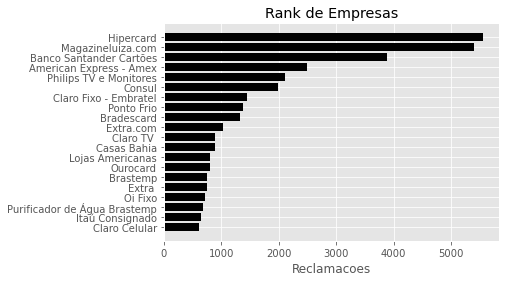

In [21]:
#5.3) Quais empresas podemos comparar?

fig, ax = plt.subplots()

y_pos = np.arange(len(df['Nome Fantasia'].value_counts()[:20]))
values = df['Nome Fantasia'].value_counts()[:20]
segmentos = df['Nome Fantasia'].unique()[:20]

ax.barh(y_pos, values, align='center', color='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(segmentos)
ax.invert_yaxis()
ax.set_xlabel('Reclamacoes')
ax.set_title('Rank de Empresas')

plt.show()

Podemos perceber que a Consul, Philips, American Express, Banco Santander, Magazineluiza e Hipercard possuem o maior numero de reclamações com mais de 2.000. Podemos fazer uma analise individual das empresas que possuem mais reclamações e identificar potenciais ações negativas da nossa empresa.

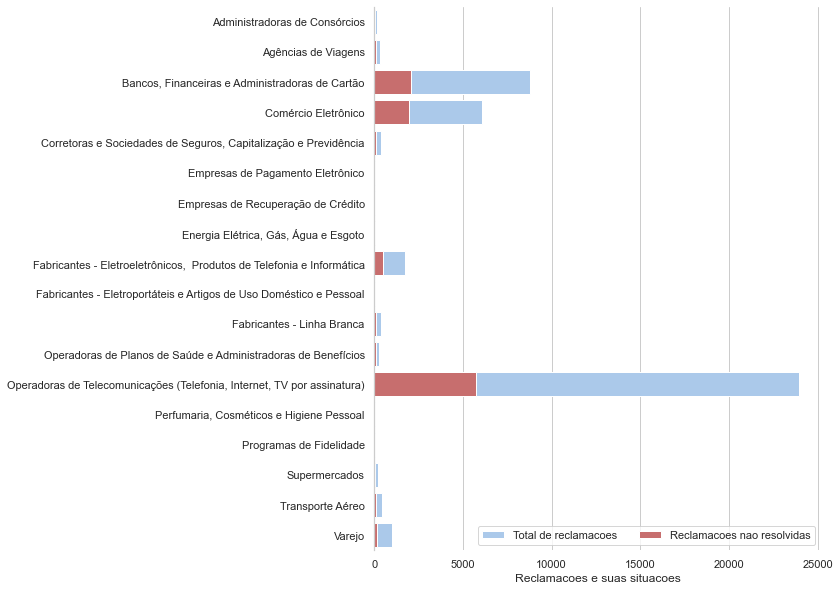

In [22]:
x = df.groupby(u'Segmento de Mercado')[u'Segmento de Mercado'].count()

#Filtrando os segmentos de mercado com mais de 20 reclamações
x = x[x > 20]

df = df[df[u'Segmento de Mercado'].isin(x.keys())]
df = df[df[u'Avaliação Reclamação']==u'Não Resolvida']
x1 = df.groupby(u'Segmento de Mercado')[u'Segmento de Mercado'].count()
x1

sns.set(style="whitegrid")

f, ax = plt.subplots(figsize=(8, 10))

sns.set_color_codes("pastel")
sns.barplot(x=x.values, y=x.keys(), label="Total de reclamacoes", color="b")

sns.set_color_codes("muted")
sns.barplot(x=x1.values, y=x1.keys(),label="Reclamacoes nao resolvidas", color="r")

ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(ylabel="", xlabel="Reclamacoes e suas situacoes")
sns.despine(left=False, bottom=True)

In [25]:
df.groupby('Segmento de Mercado').apply(lambda x: x.Respondida.value_counts()/x.shape[0]*100).unstack()

,N,S
Segmento de Mercado,,
Administradoras de Consórcios,NaN,100.000000
Agências de Viagens,NaN,100.000000
"Bancos, Financeiras e Administradoras de Cartão",0.143130,99.856870
Comércio Eletrônico,1.222618,98.777382
"Corretoras e Sociedades de Seguros, Capitalização e Previdência",1.834862,98.165138
Empresas de Pagamento Eletrônico,11.111111,88.888889
Empresas de Recuperação de Crédito,NaN,100.000000
"Energia Elétrica, Gás, Água e Esgoto",17.241379,82.758621
"Fabricantes - Eletroeletrônicos, Produtos de Telefonia e Informática",0.394477,99.605523


De acordo com o gráfico a quantidade de reclamações não resolvidas é pequena em relação ao total de reclamações para a maioria dos segmentos.

Porém observando o gráfico mais detalhadamente encontramos um ponto critico no segmento de Eletroportáteis e Artigos de Uso Doméstico e Pessoal e do segmento de Energia Elétrica, Gás, Água e Esgoto, 25% e 17% das reclamações registradas, respectivamente, não foram atendidas. Por outro lado o segmento de telecomunicações tem um número bem maior de reclamações e sua taxa de reclamações não resolvidas não é nada fora do normal.